In [1]:
from buster import sampler, plots
import skopt.space as sp
import math

# specify two dimensions, the first as an int, the second as a float
space = sp.Space([(0, 100), (0., 100.)])

optimizer = sampler.ClassificationOptimizer(space.dimensions,
                                            random_state=1,
                                            n_initial_points=1000)


In [ ]:
# here we create a function which takes a list of sample points and returns
# the inference result from them

def func(X):

  def dummy_model_eval(c_x, c_y, r, x, y):
    return math.hypot(c_x - x, c_y - y) <= r

  answer = []
  for x, y in X:
    answer.append(dummy_model_eval(50, 50, 30, x, y))

  return answer

array([[<AxesSubplot:xlabel='$X_{0}$', ylabel='Number of samples'>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='$X_{0}$', ylabel='$X_{1}$'>,
        <AxesSubplot:xlabel='$X_{1}$', ylabel='Number of samples'>]],
      dtype=object)

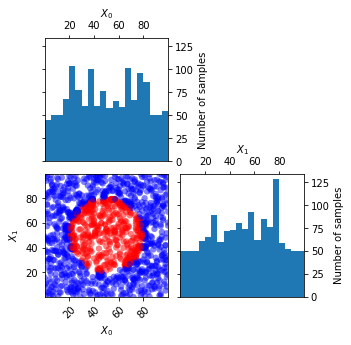

In [2]:
optimizer.run(func, n_iter=20)

result = optimizer.get_result()

plots.plot_evaluations(result)